In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

## 2. Data Cleaning and Data Manipulation

In [5]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
delete_list = ['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh',
'url']

In [7]:
for i in delete_list:
    df.drop(i, axis=1, inplace = True)

## 3. Basic Descriptive Analytics

In [8]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.293176,0.322660,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.998317,1.093336,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,19.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


## 4. Dataset Scaling Decisions

#### Scaling the numerical elements

The numerical variables in the dataset have very different ranges. For instance average rent and average disposable income have much higher max values than gasoline. So that every variable is taken into account equally in the algorithms and some variables don't have a much greater influence, we need to scale the numerical variables.

In [51]:
df_num = df.select_dtypes(include="number")
scaled_array = StandardScaler().fit_transform(df_num)
df_scaled=pd.DataFrame(scaled_array, columns=df_num.columns)
df_scaled

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355
11426,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.708047,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788
11427,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.708047,0.619544,...,-0.377549,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117
11428,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974


In [53]:
df_scaled['status'] = df['status']
df_scaled

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,legitimate
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,phishing
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,phishing
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,legitimate
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355,legitimate
11426,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.708047,-0.295128,...,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788,phishing
11427,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.708047,0.619544,...,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117,legitimate
11428,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974,legitimate


In [55]:
df_scaled.loc[ df_scaled['status'] == 'legitimate', 'status'] = 1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,1
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,phishing
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,phishing
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,1
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355,1
11426,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.708047,-0.295128,...,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788,phishing
11427,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.708047,0.619544,...,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117,1
11428,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974,1


In [56]:
df_scaled.loc[ df_scaled['status'] == 'phishing', 'status'] = 0

In [47]:
X = df_scaled.iloc[:, :81]
X

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355
11426,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.708047,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788
11427,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.708047,0.619544,...,-0.377549,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117
11428,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974


## 5. Clusterability of Scaled Dataset and Cluster Properties

We will access clusterability by using a dimensionality reduction algorithm, t-SNE, and observing the resulting cluster structure.

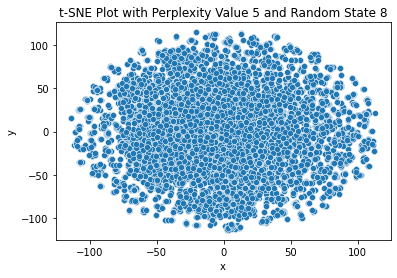

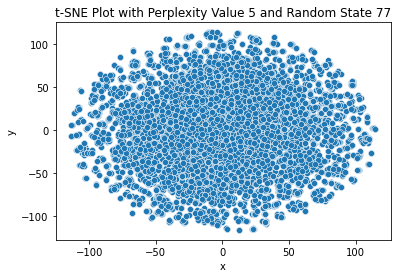

--------------------------------------------


KeyboardInterrupt: 

In [11]:
import warnings
warnings.filterwarnings("ignore")

for perp in [5,10, 20, 30, 40, 50]:
    for rs in [8,77]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_scaled, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

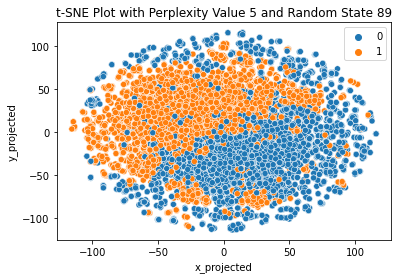

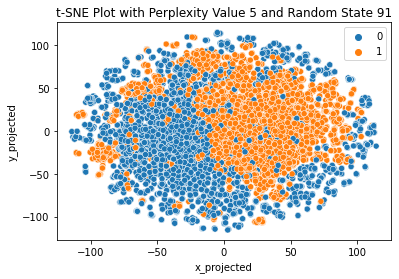

--------------------------------------------


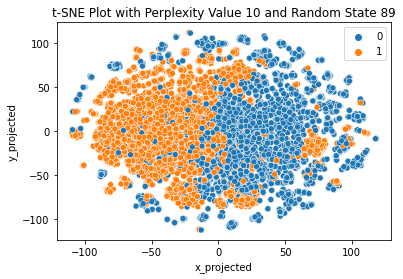

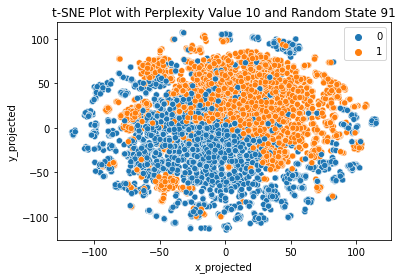

--------------------------------------------


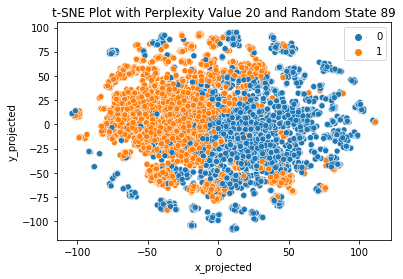

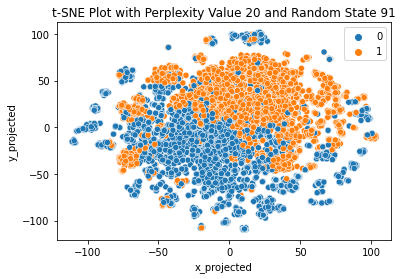

--------------------------------------------


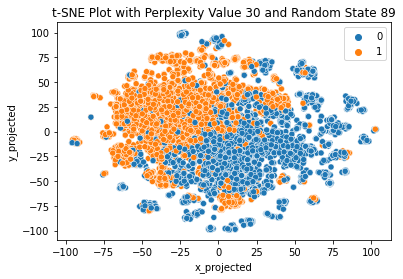

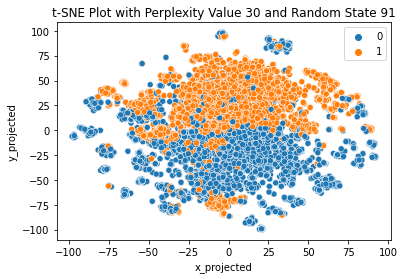

--------------------------------------------


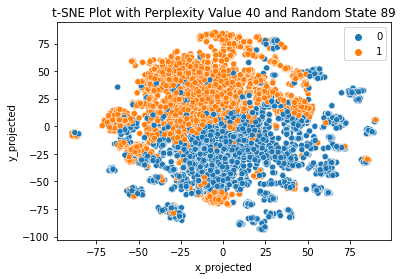

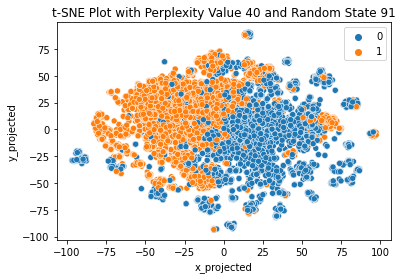

--------------------------------------------


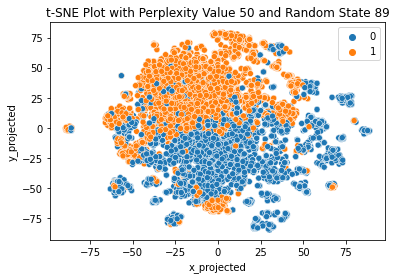

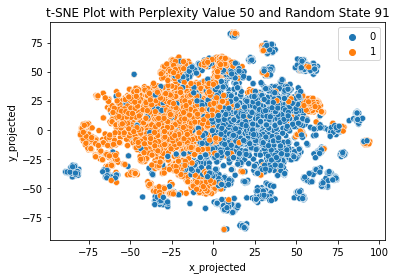

--------------------------------------------


In [57]:
warnings.filterwarnings('ignore')

for perp in [5,10, 20, 30, 40, 50]:
    for rs in [89,91]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df_scaled, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='status', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

In [62]:
sample = df_scaled.sample(n = 5000, replace = False)
sample_X = sample.iloc[:, :81]
sample_X

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
3194,-0.291649,0.270000,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,1.129194,-0.28037,-0.505112,-1.307594,-0.429340,-0.143303,0.934264,-1.255788
2465,-0.436327,0.641171,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,1.129194,-0.28037,-0.298910,1.315611,-0.118205,-0.143303,-1.070361,0.320974
4936,1.715770,4.352883,2.375182,2.569495,0.959489,-0.142915,2.356473,2.237556,2.711505,0.619544,...,2.648665,0.537498,-0.885587,3.56672,-0.604531,-1.307594,1.715663,-0.143303,0.934264,-1.255788
11147,0.106218,-0.101171,-0.421020,-0.351010,1.438647,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,1.129194,-0.28037,-0.557890,0.443569,-0.428718,-0.143303,-1.070361,0.320974
5616,0.142388,-0.101171,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,1.129194,-0.28037,-0.192127,-1.180167,-0.429340,-0.143303,0.934264,-1.255788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,1.444497,1.569099,-0.421020,-0.351010,0.001174,-0.142915,2.356473,-0.197604,0.708047,3.363561,...,-0.377549,0.537498,-0.885587,-0.28037,-0.136894,1.273135,-0.429340,-0.143303,0.934264,0.320974
6875,-0.562921,-0.565135,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.582438,-0.255030,-0.429340,-0.143303,0.934264,-1.255788
8611,-0.237394,-0.286757,-0.421020,0.379116,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.144258,-1.307594,-0.429340,-0.143303,0.934264,-0.073217
9441,-0.454412,-0.193964,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,1.129194,-0.28037,-0.573847,0.212526,0.678093,-0.143303,0.934264,-0.073217


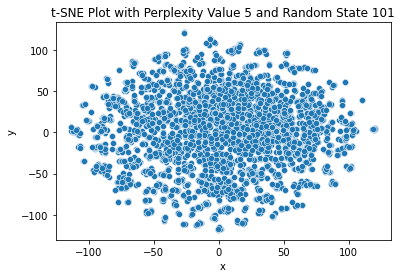

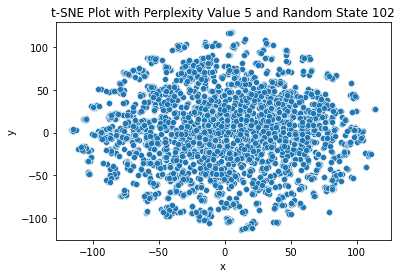

--------------------------------------------


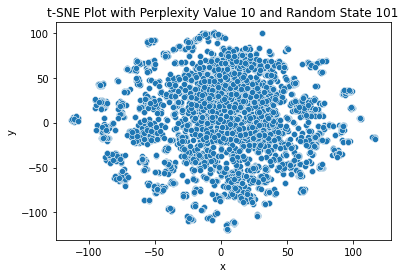

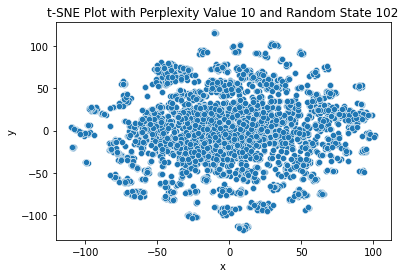

--------------------------------------------


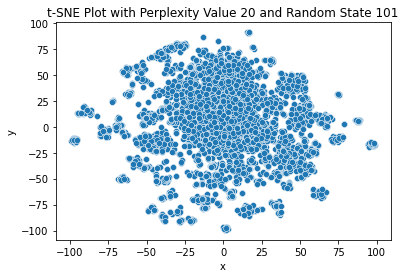

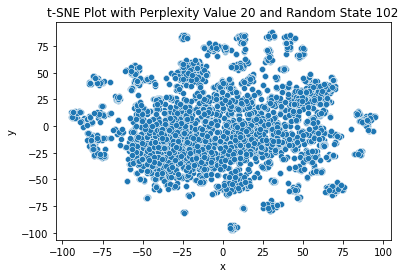

--------------------------------------------


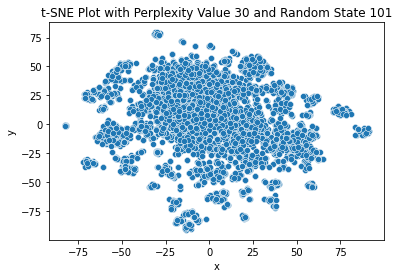

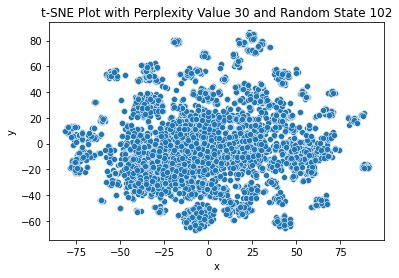

--------------------------------------------


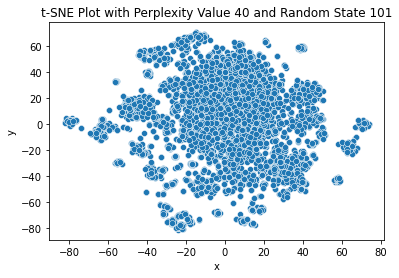

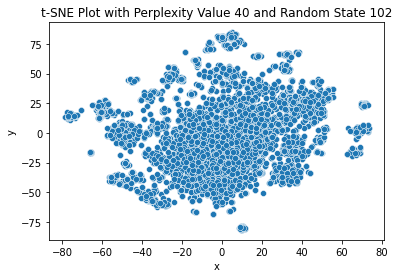

--------------------------------------------


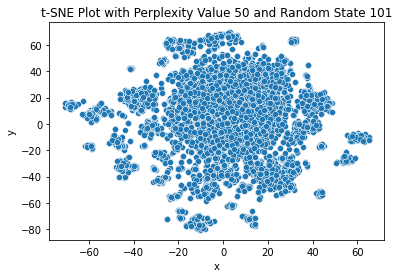

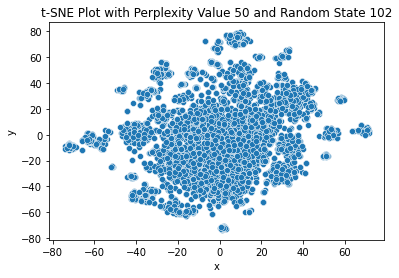

--------------------------------------------


In [197]:
import warnings
warnings.filterwarnings("ignore")

for perp in [5,10, 20, 30, 40, 50]:
    for rs in [101,102]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(sample_X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_scaled, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

In [182]:
import warnings
warnings.filterwarnings("ignore")

avg_inertia_list=[]
for k in range(1,12):
    print('-----------')
    print('Clusterings with k= '+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(df_scaled)
        sub_inertia_list.append(kmeans.inertia_)
        print('Inertia: '+str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    print('Average Inertia: '+str(np.average(sub_inertia_list)))

-----------
Clusterings with k= 1 Clusters
Inertia: 925830.0000000003
Inertia: 925830.0000000003
Inertia: 925830.0000000003
Average Inertia: 925830.0000000003
-----------
Clusterings with k= 2 Clusters
Inertia: 868073.5136168879
Inertia: 868073.5136168879
Inertia: 868073.5136168879
Average Inertia: 868073.5136168879
-----------
Clusterings with k= 3 Clusters
Inertia: 836462.1189495603
Inertia: 836455.4080291523
Inertia: 836455.4080291522
Average Inertia: 836457.6450026216
-----------
Clusterings with k= 4 Clusters
Inertia: 810856.4490485789
Inertia: 813210.8480721221
Inertia: 809330.9051608191
Average Inertia: 811132.7340938401
-----------
Clusterings with k= 5 Clusters
Inertia: 789104.3498554792
Inertia: 791296.9579235758
Inertia: 786610.3446211264
Average Inertia: 789003.8841333939
-----------
Clusterings with k= 6 Clusters
Inertia: 769949.2613159074
Inertia: 767373.0816667547
Inertia: 767372.6889206617
Average Inertia: 768231.6773011079
-----------
Clusterings with k= 7 Clusters
Ine

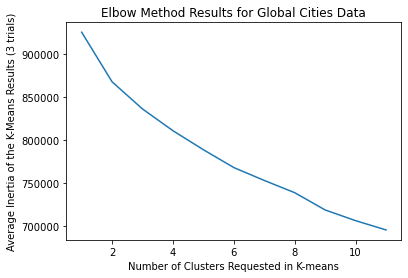

In [183]:
plt.plot(range(1,12),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Global Cities Data')
plt.show()

In [184]:
kmeans=KMeans(n_clusters=2).fit(df_scaled)
df_scaled['predicted_cluster']=kmeans.labels_
df_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,predicted_cluster
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,1
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,0
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,1
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,1


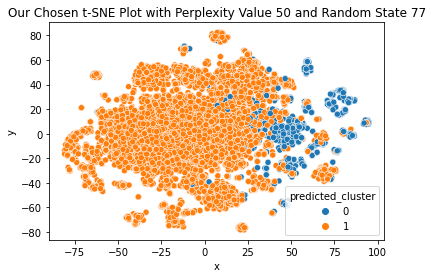

In [185]:
tsne = TSNE(n_components=2, perplexity=50, random_state=77)
data_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df_scaled, df_tsne], axis=1)
sns.scatterplot(x='x',y='y', hue = 'predicted_cluster', data=df_combo)
plt.title('Our Chosen t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 77))
plt.show()

In [13]:
sample_X

NameError: name 'sample_X' is not defined

In [191]:
import warnings
warnings.filterwarnings("ignore")

avg_inertia_list=[]
for k in range(1,12):
    print('-----------')
    print('Clusterings with k= '+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(sample_X)
        sub_inertia_list.append(kmeans.inertia_)
        print('Inertia: '+str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    print('Average Inertia: '+str(np.average(sub_inertia_list)))

-----------
Clusterings with k= 1 Clusters
Inertia: 396311.5080343691
Inertia: 396311.5080343691
Inertia: 396311.5080343691
Average Inertia: 396311.50803436915
-----------
Clusterings with k= 2 Clusters
Inertia: 371424.1140026606
Inertia: 371424.11400266056
Inertia: 371391.3287130238
Average Inertia: 371413.18557278166
-----------
Clusterings with k= 3 Clusters
Inertia: 357924.95092889416
Inertia: 357925.4353689498
Inertia: 357925.93378905463
Average Inertia: 357925.4400289662
-----------
Clusterings with k= 4 Clusters
Inertia: 347166.27235155564
Inertia: 346994.84746805445
Inertia: 348300.0954585272
Average Inertia: 347487.0717593791
-----------
Clusterings with k= 5 Clusters
Inertia: 337723.64612924407
Inertia: 337381.08758311684
Inertia: 337474.11819028447
Average Inertia: 337526.28396754846
-----------
Clusterings with k= 6 Clusters
Inertia: 331255.55694680184
Inertia: 329886.8986264829
Inertia: 329738.5564778267
Average Inertia: 330293.67068370385
-----------
Clusterings with k= 7

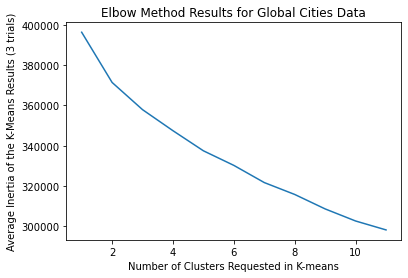

In [192]:
plt.plot(range(1,12),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Global Cities Data')
plt.show()

In [193]:
kmeans=KMeans(n_clusters=2).fit(sample_X)
sample_X['predicted_cluster']=kmeans.labels_
sample_X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,predicted_cluster
4276,-0.671431,-0.472342,-0.42102,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,1.129194,-0.28037,-0.604531,-1.307594,-0.429340,-0.143303,-1.070361,-0.467407,0
8123,-0.599091,-0.193964,-0.42102,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.146713,1.040483,0.314314,-0.143303,-1.070361,0.715164,0
3230,-0.599091,-0.101171,-0.42102,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.311184,1.318829,-0.429340,-0.143303,-1.070361,0.320974,0
291,-0.092715,-0.008378,-0.42102,0.379116,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-1.860473,-0.885587,-0.28037,0.410524,0.894392,-0.392108,-0.143303,-1.070361,0.715164,0
4510,-0.291649,0.270000,-0.42102,0.379116,0.001174,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,0.537498,-0.885587,-0.28037,-0.360280,-0.431369,-0.429340,-0.143303,0.934264,-1.255788,0


### 7.4 Accessing Clustering Separation and Cohesion 
##### Evaluating Average Silhouette Scores for K-Means

We will now use Silhoette scores to determine whether these clusters are most separated and cohesive at k=2 clusters.

In [1]:
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'pyclustertend'

In [201]:
#Evaluating for k=2,3,...,8 clusters
cluster_num_list=range(2,7)

#Will use 3 trials (ie. generate 3 clusterings) for each k
trial_num=3

#Generating a List of Average Average Silhouette Scores 
avg_avg_sil_score_list=[]
for k in cluster_num_list:
    avg_sil_score_list=[]
    for i in range(0,trial_num):
        #Clusters the dataset
        kmeans=KMeans(n_clusters=k).fit(X)
        
        #Extract the cluster labels of the clustering
        cluster_labels = kmeans.labels_
        
        #Finds the average silhoutte score of ALL objects in the given clustering
        avg_sil_score=silhouette_score(X, cluster_labels)
        
        #Appends this 
        avg_sil_score_list.append(avg_sil_score)
    print('Average Silhouette Scores of %s Clusterings, Each with k=%s Clusters'%(trial_num,k))
    print(avg_sil_score_list)
    
    #Takes the average of the three average silhouette scores (from each of the three clustering with k clusters produced)
    avg_avg_sil_score_list.append(np.average(avg_sil_score_list))
    

Average Silhouette Scores of 3 Clusterings, Each with k=2 Clusters
[0.33233623963141573, 0.3283674912403991, 0.3321481423843666]
Average Silhouette Scores of 3 Clusterings, Each with k=3 Clusters
[0.064978681266906, 0.06470878596800102, 0.06478068911747101]
Average Silhouette Scores of 3 Clusterings, Each with k=4 Clusters
[0.056139878100146985, 0.06940715606371721, 0.06927126500811337]
Average Silhouette Scores of 3 Clusterings, Each with k=5 Clusters
[0.061857432693527385, 0.06135634051354126, 0.06108193023554757]
Average Silhouette Scores of 3 Clusterings, Each with k=6 Clusters
[0.07246453044454053, 0.07563971879411653, 0.07279648714287967]


In [202]:
avg_avg_sil_score_list

[0.3309506244187272,
 0.064822718784126,
 0.06493943305732586,
 0.061431901147538735,
 0.07363357879384558]

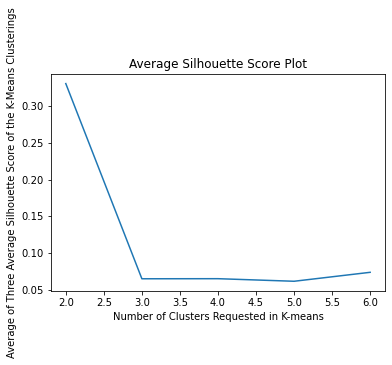

In [203]:
#Plot it    
plt.plot(cluster_num_list,avg_avg_sil_score_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average of Three Average Silhouette Score of the K-Means Clusterings')
plt.title('Average Silhouette Score Plot')
plt.show()

As we can see from the plot above, the average of three average silhouette score is highest at 2 number of clusters, which corresponds to the plot above.

In [210]:
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm
    
    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))    

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()
    
    return

##### K-means Cluster Analysis

Cluster scaled dataset into the number of k clusters selected above using k-means and a random state of 100.

In [211]:
kmeans=KMeans(n_clusters=2).fit(X)
cluster_labels = kmeans.labels_

For n_clusters = 2 The average silhouette_score is : 0.33233623963141573


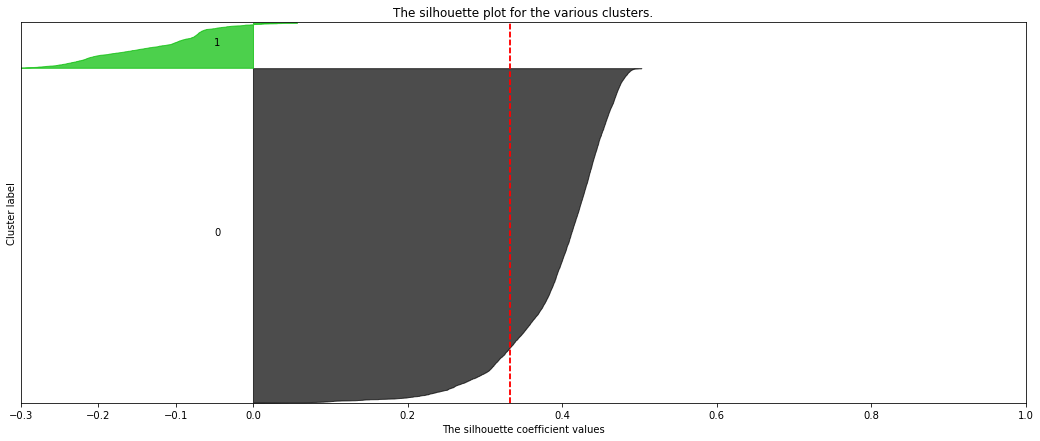

In [212]:
show_silhouette_plots(X,cluster_labels)

In [2]:
from sklearn.neighbors import NearestNeighbors

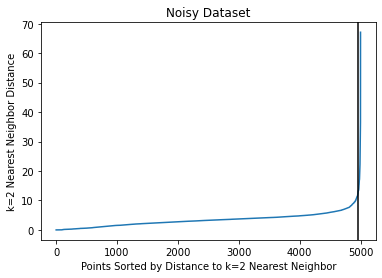

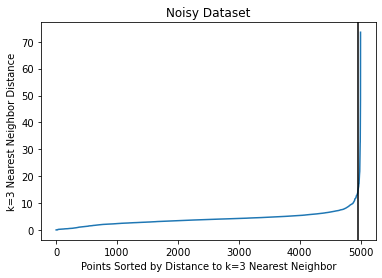

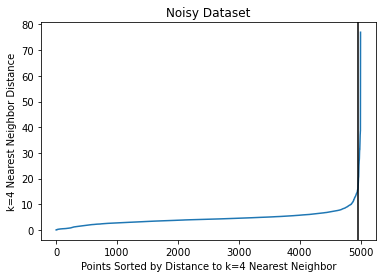

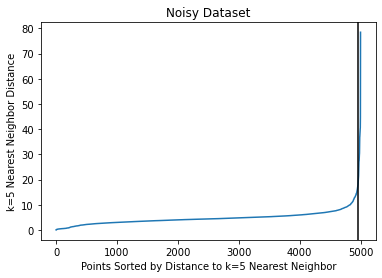

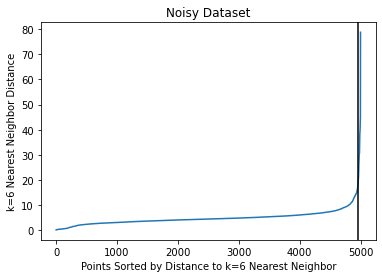

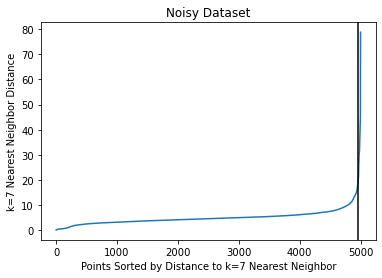

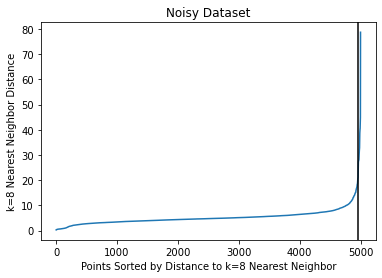

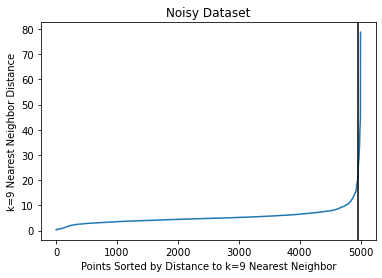

In [18]:
#Find the distance of the kth nearest neighbor
for k in range(2,10):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(sample_X)
    distances, indices = nbrs.kneighbors(sample_X)

    plt.plot(np.sort(distances.T[k-1]))
    plt.axvline(x=4950, color='black')
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Noisy Dataset')
    plt.show()

In [35]:
X.iloc[:, 0:82]

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355
11426,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.708047,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788
11427,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.708047,0.619544,...,-0.377549,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117
11428,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,...,-0.377549,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974


In [32]:
from sklearn import manifold

In [39]:
# df_train = pd.read_csv("fashion-mnist_train.csv")
# df_test = pd.read_csv("fashion-mnist_test.csv")
df_train_pixels = X.iloc[:, 0:81]
df_target = df.iloc[:, 81]

In [40]:
#Using first 10000 data to do T-SNE.
tsne = manifold.TSNE(n_components=2, random_state=1)
transf_data = tsne.fit_transform(X.to_numpy())
df_tsne = pd.DataFrame(np.column_stack((transf_data, df_target)),
                      columns = ["X", "y", "status"])
df_tsne.head()

,X,y,status
0,42.482197,-78.143074,legitimate
1,65.789047,-5.601669,phishing
2,88.743156,15.640573,phishing
3,-22.831667,-15.799391,legitimate
4,-56.883625,-38.449581,legitimate


<AxesSubplot:xlabel='X', ylabel='y'>

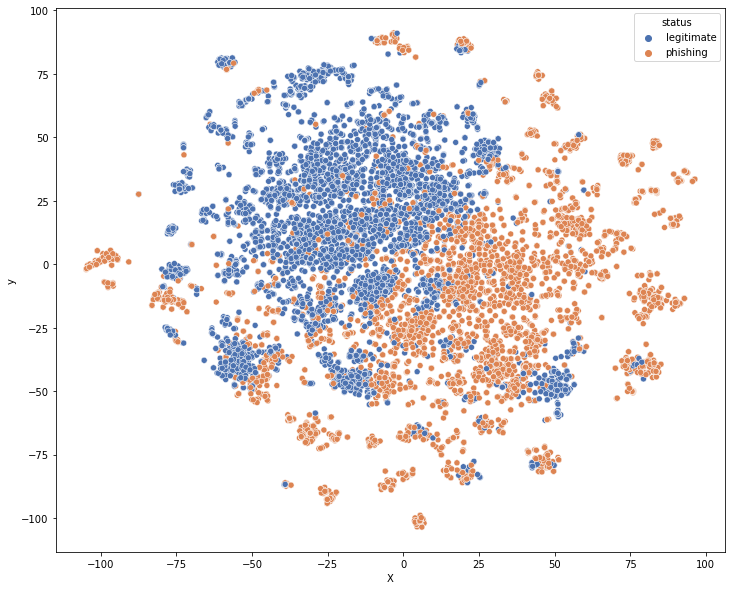

In [42]:
fig= plt.figure(figsize=(12,10))
sns.scatterplot(data=df_tsne, x="X", y="y", hue="status", palette="deep")

In [144]:
'''
Shuyuan Chen
CS412
HW3
'''


def ord_prefixspan(file, minsup):
    def read_data(file):
        db = []
        lines = file
        for line in lines:
            currentline = line.split(", ")
            cur = ''
            for i in currentline[1]:
                if i == '<' or i == '>':
                    continue
                else:
                     cur += i
            db.append(cur)
        return db
    
    
    def subsequence(text, subseq_length):
        if subseq_length <= 0:
            return []

        if subseq_length == 1:
            return list(text)

        text_length = len(text)
        res = []
        tail_length = subseq_length - 1
        for i in range(0, text_length - tail_length):
            for tail in subsequence(text[i+1:], tail_length):
                res.append(text[i] + tail)
        return res 
    
    db = read_data(file)    
    temp = []     
    for item in db:
        curlength = len(item)
        for sublength in range(1, curlength + 1):
            temp.extend(subsequence(item, sublength))
        
        
    def is_subseq(x, y):
        it = iter(y)
        return all(any(c == ch for c in it) for ch in x)
        
    dic = {}
    for subsequence in temp:
        if is_subseq(subsequence, item):
            if subsequence in dic:
                dic[subsequence] += 1
            else:
                dic[subsequence] = 1

    f = dict([(k, v) for k, v in dic.items() if v >= minsup])
    return f
 

#     def get_c1(file):
#         db = read_data(file)
#         c1 = {}
#         for c in range(ord('a'), ord('z')+1):
#             cnt = sum([chr(c) in item for item in db])
#             if cnt > 0:
#                 c1[chr(c)] = cnt
#         return c1

#     def get_f1(file, minsup):
#         c1 = get_c1(file)
#         f1 = dict([(k, v) for k, v in c1.items() if v >= minsup])
#         return f1


#     k = 1
#     f = get_f1(file, minsup)
#     db = read_data(file)
#     res = f.copy()

#     while f:
#         k += 1
#         c = {}
#         for i in range(len(db)):
#             temp_list = []
#             for j in range(len(db[i]) - k + 1):
#                 temp_str = ''
#                 for z in range(j, j + k):
#                     temp_str += db[i][z]
#                 temp_list.append(temp_str)
#             temp_set = set(temp_list)

#             for i in range(ord('a'), ord('z')+1):
#                 cnt = sum([chr(i) in item for item in temp_set])
#                 if cnt > 0:
#                     c[chr(i)] = cnt
       
#         f = dict([(k, v) for k, v in c.items() if v >= minsup])

#         for key, value in f.items():
#             res[key] = value

#     return res



In [142]:
def read_data(file):
    db = []
    lines = file
    for line in lines:
        currentline = line.split(", ")
        cur = ''
        for i in currentline[1]:
            if i == '<' or i == '>':
                continue
            else:
                 cur += i
        db.append(cur)
    return db

In [129]:
file = ['s1, <aabcacdcf>','s2, <adcbcae>','s3, <efabdfcb>','s4, <egafcbc>']

In [145]:
ord_prefixspan(file, 3)

{'a': 7,
 'b': 5,
 'c': 8,
 'f': 4,
 'ab': 6,
 'ac': 13,
 'af': 5,
 'bc': 6,
 'cc': 5,
 'abc': 9,
 'acc': 9,
 'e': 3,
 'cb': 3,
 'acb': 3,
 'ef': 3,
 'eb': 3,
 'ec': 3,
 'fb': 4,
 'fc': 4,
 'efb': 4,
 'efc': 4,
 'eab': 3,
 'eac': 3,
 'fcb': 3,
 'afc': 3,
 'efcb': 3,
 'eafc': 3}

In [143]:
read_data(file)

['aabcacdcf', 'adcbcae', 'efabdfcb', 'egafcbc']

In [141]:
ord_prefixspan(file, 3)

{'a': 3,
 'c': 3,
 'aa': 3,
 'ac': 8,
 'ad': 3,
 'af': 3,
 'bc': 3,
 'cc': 3,
 'cf': 3,
 'aac': 7,
 'aad': 3,
 'aaf': 3,
 'abc': 6,
 'acc': 7,
 'acd': 5,
 'acf': 8,
 'adc': 3,
 'adf': 3,
 'bcc': 3,
 'bcf': 3,
 'ccf': 3,
 'aabc': 3,
 'aacc': 5,
 'aacd': 4,
 'aacf': 7,
 'aadc': 3,
 'aadf': 3,
 'abcc': 6,
 'abcd': 4,
 'abcf': 6,
 'abac': 4,
 'acac': 4,
 'accf': 7,
 'acdc': 5,
 'acdf': 5,
 'adcf': 3,
 'bccf': 3,
 'aabcc': 3,
 'aabcf': 3,
 'aaccf': 5,
 'aacdc': 4,
 'aacdf': 4,
 'aadcf': 3,
 'abcac': 4,
 'abccf': 6,
 'abcdc': 4,
 'abcdf': 4,
 'abacf': 4,
 'acacf': 4,
 'acdcf': 5,
 'aabccf': 3,
 'aacdcf': 4,
 'abcacf': 4,
 'abcdcf': 4}

In [134]:
db = ['aabcacdcf']
def getallsub(db):
    def subsequence(text, subseq_length):
        if subseq_length <= 0:
            return []

        if subseq_length == 1:
            return list(text)

        text_length = len(text)
        res = []
        tail_length = subseq_length - 1
        for i in range(0, text_length - tail_length):
            for tail in subsequence(text[i+1:], tail_length):
                res.append(text[i] + tail)
        return res 
    temp = []
    for item in db:
        curlength = len(item)
        for sublength in range(1, curlength + 1):
            temp.extend(subsequence(item, sublength))
    return temp 


In [137]:
temp = getallsub(db)

In [138]:
dic = {}
for item in ['aabcacdcf']:
    for subsequence in temp:
        if is_subseq(subsequence, item):
            if subsequence in dic:
                dic[subsequence] += 1
            else:
                dic[subsequence] = 1

f = dict([(k, v) for k, v in dic.items() if v >= minsup])
f 

KeyError: 'a'

In [146]:
list1 = [1,2]
list2 = [3,4]
list1 + list2

[1, 2, 3, 4]

In [122]:
def is_subseq(x, y):
    it = iter(y)
    return all(any(c == ch for c in it) for ch in x)

In [123]:
is_subseq('a', 'abc')

True

In [ ]:
def subsequence(text, subseq_length):
    if subseq_length <= 0:
    return []

    if subseq_length == 1:
        return list(text)

    text_length = len(text)
    res = []
    tail_length = subseq_length - 1
    for i in range(0, text_length - tail_length):
        for tail in subsequence(text[i+1:], tail_length):
            res.append(text[i] + tail)
    return res

In [71]:
def ord_prefixspan(file, minsup):
    def read_data(file):
        db = []
        lines = file
        for line in lines:
            currentline = line.split(", ")
            temp = []
            for i in currentline[1]:
                if i == '<' or i == '>':
                    continue
                else:
                    temp.append(i)
            db.append(temp)
        return db

    def get_c1(file):
        db = read_data(file)
        c1 = {}
        for c in range(ord('a'), ord('z')+1):
            cnt = sum([chr(c) in item for item in db])
            if cnt > 0:
                c1[chr(c)] = cnt
        return c1

    def get_f1(file, minsup):
        c1 = get_c1(file)
        f1 = dict([(k, v) for k, v in c1.items() if v >= minsup])
        return f1


    k = 1
    f = get_f1(file, minsup)
    db = read_data(file)
    res = f.copy()

    while f:
        k += 1
        c = {}
        for i in range(len(db)):
            temp_list = []
            for j in range(len(db[i]) - k + 1):
                temp_str = ''
                for z in range(j, j + k):
                    temp_str += db[i][z]
                temp_list.append(temp_str)
            temp_set = set(temp_list)

            for i in range(ord('a'), ord('z')+1):
                cnt = sum([chr(i) in item for item in temp_set])
                if cnt > 0:
                    c[chr(i)] = cnt
       
        f = dict([(k, v) for k, v in c.items() if v >= minsup])

        for key, value in f.items():
            res[key] = value

    return res

In [72]:
ord_prefixspan(file, 2)

{'a': 2, 'b': 2, 'c': 2, 'd': 2, 'e': 3, 'f': 2, 'g': 2}

In [73]:
def get_sequences(file, minsup):
    '''
    get frequency sequences
    :param file: text.txt
    :param minsup: min support
    :return: a dict
    '''
    def read_data(file):
        db = []
        lines = file
        for line in lines:
            currentline = line.split(", ")
            temp = []
            for i in currentline[1]:
                if i == '<' or i == '>':
                    continue
                else:
                    temp.append(i)
            db.append(temp)
        return db

    def get_c1(file):
        db = read_data(file)
        c1 = {}
        for item in db:
            s = set(item)
            for char in s:
                if char in c1:
                    c1[char] += 1
                else:
                    c1[char] = 1
        return c1

    def get_f1(file, minsup):
        c1 = get_c1(file)
        f1 = {}
        for key, value in c1.items():
            if value >= minsup:
                f1[key] = value
        return f1

    # print(get_c1(file))
    # print(get_f1(file, minsup))

    k = 1
    f = get_f1(file, minsup)
    db = read_data(file)
    res = f.copy()

    while f:
        k += 1
        c = {}
        for i in range(len(db)):
            temp_list = []
            for j in range(len(db[i]) - k + 1):
                temp_str = ''
                for z in range(j, j + k):
                    temp_str += db[i][z]
                temp_list.append(temp_str)
            temp_set = set(temp_list)

            for char in temp_set:
                if char in c:
                    c[char] += 1
                else:
                    c[char] = 1
        f = {}
        for key, value in c.items():
            if value >= minsup:
                f[key] = value

        for key, value in f.items():
            res[key] = value

    return res

In [74]:
get_sequences(file, 2)

{'a': 4,
 'd': 3,
 'b': 4,
 'c': 4,
 'f': 3,
 'e': 3,
 'ca': 2,
 'dc': 2,
 'ab': 2,
 'bc': 3,
 'cb': 3,
 'fc': 2,
 'bca': 2,
 'cbc': 2,
 'fcb': 2}

In [75]:
def get_c1(file):
    db = read_data(file)
    c1 = {}
    for item in db:
        s = set(item)
        for char in s:
            if char in c1:
                c1[char] += 1
            else:
                c1[char] = 1
    return c1

In [76]:
get_c1(file)

{'a': 4, 'd': 3, 'b': 4, 'c': 4, 'f': 3, 'e': 3, 'g': 1}

In [77]:
def get_c2(file):
    db = read_data(file)
    c1 = {}
    for c in range(ord('a'), ord('z')+1):
        cnt = sum([chr(c) in item for item in db])
        if cnt > 0:
            c1[chr(c)] = cnt
    return c1

In [78]:
get_c2(file)

{'a': 4, 'b': 4, 'c': 4, 'd': 3, 'e': 3, 'f': 3, 'g': 1}

In [79]:
def get_f1(file, minsup):
    c1 = get_c1(file)
    f1 = {}
    for key, value in c1.items():
        if value >= minsup:
            f1[key] = value
    return f1

In [80]:
get_f1(file, 2)

{'a': 4, 'd': 3, 'b': 4, 'c': 4, 'f': 3, 'e': 3}

In [81]:
def get_f2(file, minsup):
    c1 = get_c1(file)
    f1 = dict([(k, v) for k, v in c1.items() if v >= minsup])
    return f1

In [82]:
get_f2(file, 2)

{'a': 4, 'd': 3, 'b': 4, 'c': 4, 'f': 3, 'e': 3}